In [2]:
##!pip install openpyxl


In [3]:
import pandas as pd

In [4]:
df1=pd.read_excel('case_study1.xlsx')
df2=pd.read_excel('case_study2.xlsx')

In [5]:
df1.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32


In [6]:
print(df1.shape)
print(df2.shape)

(51336, 26)
(51336, 62)


Data Cleaning

In [7]:
df1=df1[df1['Age_Oldest_TL']!=-99999]

In [8]:
df1.shape

(51296, 26)

In [9]:
for i in df2:
    count= (df2[i] == -0.99999).any()
    percentage= (count/len(df2))*100
    if count>0:
        print(f'columns {i} ,count{count} ,percentage{percentage}')

In [10]:
column_to_be_removed=[]
for i in df2.columns:
    if(df2[i]== -99999).sum() > 10000:
        column_to_be_removed.append(i)
        print(i)

time_since_first_deliquency
time_since_recent_deliquency
max_delinquency_level
max_deliq_6mts
max_deliq_12mts
CC_utilization
PL_utilization
max_unsec_exposure_inPct


In [11]:
column_to_be_removed

['time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'CC_utilization',
 'PL_utilization',
 'max_unsec_exposure_inPct']

In [12]:
df2=df2.drop(columns=column_to_be_removed)

In [13]:
df2.shape

(51336, 54)

In [14]:
common_columns = []

for col in df1.columns:
    if col in df2.columns:
        common_columns.append(col)

print(common_columns)

['PROSPECTID']


In [15]:
df=pd.merge(df1,df2,how='inner',on='PROSPECTID')

In [16]:
df.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0.0,0.0,0.0,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0.0,0.0,0.0,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0.0,0.0,0.0,0.0,1,0,ConsumerLoan,others,693,P2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0.0,0.0,0.0,0.0,0,0,others,others,673,P2
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0.0,0.0,0.0,0.0,0,0,AL,AL,753,P1


In [17]:
df.shape

(51296, 79)

# check categorical features

In [18]:
for i in df.columns:
    if df[i].dtypes=='object':
        print(i)

MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


In [19]:
df.MARITALSTATUS.value_counts()

MARITALSTATUS
Married    37724
Single     13572
Name: count, dtype: int64

In [20]:
df.EDUCATION.value_counts()

EDUCATION
GRADUATE          16655
12TH              14458
SSC                9268
UNDER GRADUATE     5491
OTHERS             2915
POST-GRADUATE      2240
PROFESSIONAL        269
Name: count, dtype: int64

In [21]:
df.GENDER.value_counts()

GENDER
M    45211
F     6085
Name: count, dtype: int64

In [22]:
df.Approved_Flag.value_counts()

Approved_Flag
P2    32162
P3     7449
P4     5882
P1     5803
Name: count, dtype: int64

# Feature Selection

## Hypothesis Testing

**Chi.Square Test** 
To check whether the categorical features are associated with output feature or not. It means whether we can keep categorical feature or we should remove it

### Hypothesis Testing for Feature Selection


For each categorical feature, we define the hypotheses as follows:

#### Null Hypothesis (H0):

There is **no relationship** between the feature and the target variable (they are independent).  
- The feature **does not influence** the target.
- It **should be removed** if (H0) is true.

#### Alternative Hypothesis (H1):

There **is a relationship** between the feature and the target variable (they are dependent).  
- The feature **affects** the target
- It **should be kept** if (H0) is rejected.

In [23]:
#!pip install scipy

In [24]:
import pandas as pd
from scipy.stats import chi2_contingency

for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
    chi2, pval, dof, expected = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i, '---', pval)

MARITALSTATUS --- 2.7347247145640217e-257
EDUCATION --- 6.772122013692765e-38
GENDER --- 0.00025924146444508505
last_prod_enq2 --- 0.0
first_prod_enq2 --- 0.0


In [25]:
#!pip install statsmodels

In [26]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecting numerical features
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
vif_data = df[numeric_columns].copy()

# Set VIF threshold
vif_threshold = 6
columns_to_be_kept = []

while True:
    vif_values = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    vif_df = pd.DataFrame({"Feature": vif_data.columns, "VIF": vif_values})
    
    # Print VIF values
    print(vif_df.sort_values(by="VIF", ascending=False))
    
    max_vif = vif_df["VIF"].max()
    
    if max_vif < vif_threshold:
        break  # Stop if all VIFs are below threshold
    
    # Drop feature with highest VIF
    drop_feature = vif_df.loc[vif_df["VIF"] == max_vif, "Feature"].values[0]
    print(f"Dropping {drop_feature} with VIF: {max_vif}")
    vif_data.drop(columns=[drop_feature], inplace=True)

# Store final features with low VIF
columns_to_be_kept = vif_data.columns.tolist()

print("\nFinal Features with Low VIF:\n", columns_to_be_kept)

C:\Users\avinash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                      Feature       VIF
1                    Total_TL       inf
3               Tot_Active_TL       inf
2               Tot_Closed_TL       inf
8               pct_active_tl       inf
20                      PL_TL       inf
..                        ...       ...
60        Time_With_Curr_Empr  1.265841
26  time_since_recent_payment  1.230058
59           NETMONTHLYINCOME  1.055621
63      pct_currentBal_all_TL  1.005981
0                  PROSPECTID  1.001322

[73 rows x 2 columns]
Dropping Total_TL with VIF: inf


C:\Users\avinash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                      Feature       VIF
1               Tot_Closed_TL       inf
2               Tot_Active_TL       inf
7               pct_active_tl       inf
19                      PL_TL       inf
20                 Secured_TL       inf
..                        ...       ...
59        Time_With_Curr_Empr  1.265841
25  time_since_recent_payment  1.230058
58           NETMONTHLYINCOME  1.055621
62      pct_currentBal_all_TL  1.005981
0                  PROSPECTID  1.001322

[72 rows x 2 columns]
Dropping Tot_Closed_TL with VIF: inf


C:\Users\avinash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                      Feature       VIF
6               pct_active_tl       inf
17                    Home_TL       inf
18                      PL_TL       inf
19                 Secured_TL       inf
20               Unsecured_TL       inf
..                        ...       ...
58        Time_With_Curr_Empr  1.265841
24  time_since_recent_payment  1.230058
57           NETMONTHLYINCOME  1.055621
61      pct_currentBal_all_TL  1.005981
0                  PROSPECTID  1.001322

[71 rows x 2 columns]
Dropping pct_active_tl with VIF: inf


C:\Users\avinash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                      Feature       VIF
16                    Home_TL       inf
17                      PL_TL       inf
18                 Secured_TL       inf
19               Unsecured_TL       inf
13                      CC_TL       inf
..                        ...       ...
57        Time_With_Curr_Empr  1.265841
23  time_since_recent_payment  1.230058
56           NETMONTHLYINCOME  1.055621
60      pct_currentBal_all_TL  1.005981
0                  PROSPECTID  1.001322

[70 rows x 2 columns]
Dropping Auto_TL with VIF: inf


C:\Users\avinash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                      Feature           VIF
27          num_deliq_6_12mts           inf
25             num_deliq_6mts           inf
26            num_deliq_12mts           inf
46                CC_enq_L12m  1.311116e+10
45                 CC_enq_L6m  1.126722e+10
..                        ...           ...
56        Time_With_Curr_Empr  1.265841e+00
22  time_since_recent_payment  1.230058e+00
55           NETMONTHLYINCOME  1.055621e+00
59      pct_currentBal_all_TL  1.005981e+00
0                  PROSPECTID  1.001322e+00

[69 rows x 2 columns]
Dropping num_deliq_6mts with VIF: inf
                      Feature           VIF
45                CC_enq_L12m  1.311116e+10
44                 CC_enq_L6m  1.126722e+10
47                 PL_enq_L6m  7.095182e+09
48                PL_enq_L12m  6.397795e+09
43                     CC_enq  3.176226e+09
..                        ...           ...
55        Time_With_Curr_Empr  1.265841e+00
22  time_since_recent_payment  1.230058e+00
54           NE

In [27]:
# check Anova for columns_to_be_kept 

from scipy.stats import f_oneway

columns_to_be_kept_numerical = []

for i in columns_to_be_kept:
    a = list(df[i])  
    b = list(df['Approved_Flag'])  
    
    group_P1 = [value for value, group in zip(a, b) if group == 'P1']
    group_P2 = [value for value, group in zip(a, b) if group == 'P2']
    group_P3 = [value for value, group in zip(a, b) if group == 'P3']
    group_P4 = [value for value, group in zip(a, b) if group == 'P4']


    f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)

    if p_value <= 0.05:
        columns_to_be_kept_numerical.append(i)

In [28]:
len(columns_to_be_kept_numerical)

38

In [29]:
df=df[columns_to_be_kept_numerical+['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']+['Approved_Flag']]
df.head()

,PROSPECTID,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_closed_L6M,pct_closed_tl,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Consumer_TL,...,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag
0,1,0,0,0.0,0.800,0.00,0.0,0,0,0,...,0.0,0.0,1,0,Married,12TH,M,PL,PL,P2
1,2,0,0,0.0,0.000,1.00,0.0,0,0,1,...,0.0,0.0,0,0,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan,P2
2,3,1,0,0.0,0.000,0.25,0.0,1,0,6,...,0.0,0.0,1,0,Married,SSC,M,ConsumerLoan,others,P2
3,4,1,0,0.0,0.000,1.00,0.0,1,0,0,...,0.0,0.0,0,0,Married,SSC,M,others,others,P2
4,5,0,0,0.0,0.667,0.00,0.0,0,0,0,...,0.0,0.0,0,0,Married,POST-GRADUATE,M,AL,AL,P1


In [30]:
#!pip install scikit-learn

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

# Encode 'Approved_Flag' separately
label_encoder = LabelEncoder()
df['Approved_Flag'] = label_encoder.fit_transform(df['Approved_Flag'])  # ✅ Encode separately

# Define preprocessor
preprocessor = ColumnTransformer([
    ('ordinal', OrdinalEncoder(), ['EDUCATION']),  # ✅ Pass as a list
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), 
     ['GENDER', 'last_prod_enq2', 'first_prod_enq2', 'MARITALSTATUS'])
], remainder='passthrough')  # Keep other columns as they are

In [32]:
transformed_data = preprocessor.fit_transform(df)

In [33]:
feature_names = preprocessor.get_feature_names_out()  # Get transformed feature names
df_transformed = pd.DataFrame(transformed_data, columns=feature_names)

In [34]:
df_transformed

,ordinal__EDUCATION,onehot__GENDER_M,onehot__last_prod_enq2_CC,onehot__last_prod_enq2_ConsumerLoan,onehot__last_prod_enq2_HL,onehot__last_prod_enq2_PL,onehot__last_prod_enq2_others,onehot__first_prod_enq2_CC,onehot__first_prod_enq2_ConsumerLoan,onehot__first_prod_enq2_HL,...,remainder__NETMONTHLYINCOME,remainder__Time_With_Curr_Empr,remainder__pct_opened_TLs_L6m_of_L12m,remainder__CC_Flag,remainder__PL_Flag,remainder__pct_PL_enq_L6m_of_ever,remainder__pct_CC_enq_L6m_of_ever,remainder__HL_Flag,remainder__GL_Flag,remainder__Approved_Flag
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,51000.0,114.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,19000.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,191.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,10000.0,246.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15000.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51291,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,18500.0,249.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
51292,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,25000.0,186.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51293,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18000.0,66.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,2.0
51294,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12802.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
df_transformed.columns

Index(['ordinal__EDUCATION', 'onehot__GENDER_M', 'onehot__last_prod_enq2_CC',
       'onehot__last_prod_enq2_ConsumerLoan', 'onehot__last_prod_enq2_HL',
       'onehot__last_prod_enq2_PL', 'onehot__last_prod_enq2_others',
       'onehot__first_prod_enq2_CC', 'onehot__first_prod_enq2_ConsumerLoan',
       'onehot__first_prod_enq2_HL', 'onehot__first_prod_enq2_PL',
       'onehot__first_prod_enq2_others', 'onehot__MARITALSTATUS_Single',
       'remainder__PROSPECTID', 'remainder__Total_TL_opened_L6M',
       'remainder__Tot_TL_closed_L6M', 'remainder__pct_tl_closed_L6M',
       'remainder__pct_closed_tl', 'remainder__pct_tl_open_L12M',
       'remainder__pct_tl_closed_L12M', 'remainder__Tot_Missed_Pmnt',
       'remainder__CC_TL', 'remainder__Consumer_TL', 'remainder__Gold_TL',
       'remainder__Home_TL', 'remainder__PL_TL', 'remainder__Other_TL',
       'remainder__Age_Oldest_TL', 'remainder__Age_Newest_TL',
       'remainder__time_since_recent_payment',
       'remainder__num_times_de

In [36]:
from sklearn.model_selection import train_test_split

In [38]:
X = df_transformed.drop(columns=['remainder__Approved_Flag']) 
y = df_transformed['remainder__Approved_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((41036, 51), (10260, 51), (41036,), (10260,))

In [40]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 5.6 MB/s eta 0:00:27
   ---------------------------------------- 1.8/150.0 MB 5.0 MB/s eta 0:00:30
    --------------------------------------- 2.6/150.0 MB 4.6 MB/s eta 0:00:33
    --------------------------------------- 3.4/150.0 MB 4.4 MB/s eta 0:00:34
   - -------------------------------------- 4.2/150.0 MB 4.3 MB/s eta 0:00:35
   - -------------------------------------- 5.0/150.0 MB 4.2 MB/s eta 0:00:35
   - -------------------------------------- 5.8/150.0 MB 4.0 MB/s eta 0:00:37
   - -------------------------------------- 6.3/150.0 MB 3.8 MB/s eta 0:00:38
   - -------------------------------------- 6.8/150.0 MB 3.7 MB/s eta 0:00:39
   -- ------------------------------------- 7.6/150.0 MB 3.7 MB/s eta 0:00:39
   -- ------------------------------------- 8.1/150.0 MB 3.7 MB/s eta 0

In [41]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [42]:
# Choose one: StandardScaler OR MinMaxScaler

# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Min-Max Scaling (optional alternative)
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [43]:
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
y_pred_rf = rf_classifier.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')

Random Forest Accuracy: 0.7541


In [44]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=4, random_state=42)
xgb_classifier.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_classifier.predict(X_test_scaled)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {xgb_accuracy:.4f}')

XGBoost Accuracy: 0.7579


In [45]:
dt_classifier = DecisionTreeClassifier(max_depth=20, min_samples_split=10, random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
y_pred_dt = dt_classifier.predict(X_test_scaled)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {dt_accuracy:.4f}')

Decision Tree Accuracy: 0.6909


In [46]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)
y_pred_nb = nb_classifier.predict(X_test_scaled)

nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f'Naïve Bayes Accuracy: {nb_accuracy:.4f}')

Naïve Bayes Accuracy: 0.5370


In [47]:
model_results = {
    "Random Forest": rf_accuracy,
    "XGBoost": xgb_accuracy,
    "Decision Tree": dt_accuracy,
    "Naïve Bayes": nb_accuracy
}

# Display results sorted by accuracy
sorted_results = sorted(model_results.items(), key=lambda x: x[1], reverse=True)
for model, acc in sorted_results:
    print(f"{model}: {acc:.4f}")

XGBoost: 0.7579
Random Forest: 0.7541
Decision Tree: 0.6909
Naïve Bayes: 0.5370


In [49]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(xgb.XGBClassifier(objective='multi:softmax', num_class=4), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print(f'Best XGBoost Params: {grid_search.best_params_}')
print(f'Best XGBoost Accuracy: {grid_search.best_score_:.4f}')

C:\Users\avinash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
151 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\avinash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\avinash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\lo

Best XGBoost Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best XGBoost Accuracy: 0.7210


In [51]:
rf_cv_scores = cross_val_score(RandomForestClassifier(n_estimators=200, random_state=42), X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f'Random Forest Cross-Validation Accuracy: {np.mean(rf_cv_scores):.4f} ± {np.std(rf_cv_scores):.4f}')

Random Forest Cross-Validation Accuracy: 0.7512 ± 0.0039


In [53]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [54]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['p1', 'p2', 'p3', 'p4'], yticklabels=['p1', 'p2', 'p3', 'p4'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

Random Forest Classification Report:
              precision    recall  f1-score   support

          p1       0.80      0.73      0.76      1161
          p2       0.79      0.93      0.85      6433
          p3       0.42      0.17      0.24      1490
          p4       0.63      0.57      0.60      1176

    accuracy                           0.75     10260
   macro avg       0.66      0.60      0.61     10260
weighted avg       0.72      0.75      0.73     10260



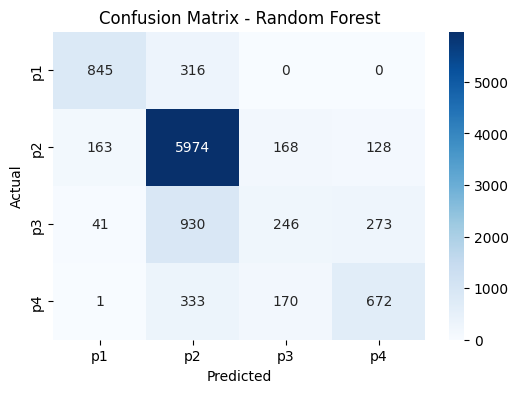

XGBoost Classification Report:
              precision    recall  f1-score   support

          p1       0.77      0.77      0.77      1161
          p2       0.81      0.91      0.86      6433
          p3       0.40      0.20      0.26      1490
          p4       0.63      0.63      0.63      1176

    accuracy                           0.76     10260
   macro avg       0.65      0.63      0.63     10260
weighted avg       0.73      0.76      0.74     10260



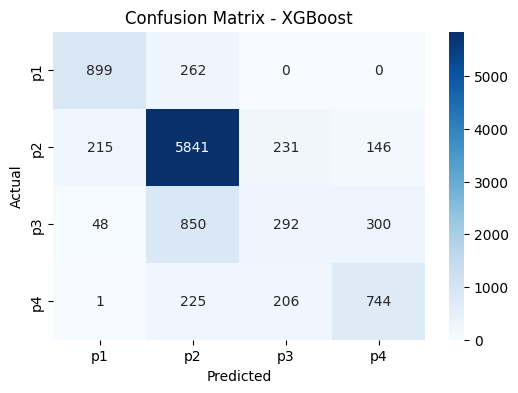

Naïve Bayes Classification Report:
              precision    recall  f1-score   support

          p1       0.45      0.51      0.48      1161
          p2       0.76      0.61      0.68      6433
          p3       0.22      0.13      0.16      1490
          p4       0.27      0.68      0.39      1176

    accuracy                           0.54     10260
   macro avg       0.43      0.48      0.43     10260
weighted avg       0.59      0.54      0.55     10260



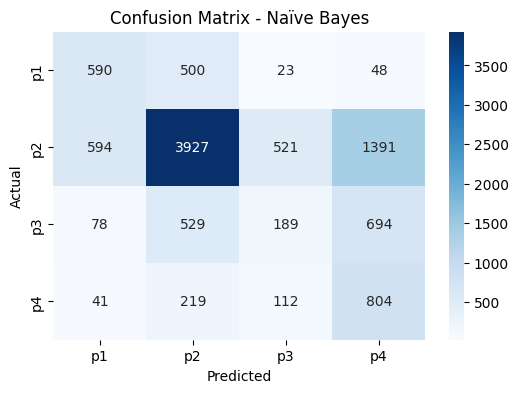

Decision Tree Classification Report:
              precision    recall  f1-score   support

          p1       0.68      0.70      0.69      1161
          p2       0.80      0.83      0.81      6433
          p3       0.29      0.24      0.26      1490
          p4       0.52      0.47      0.50      1176

    accuracy                           0.69     10260
   macro avg       0.57      0.56      0.57     10260
weighted avg       0.68      0.69      0.68     10260



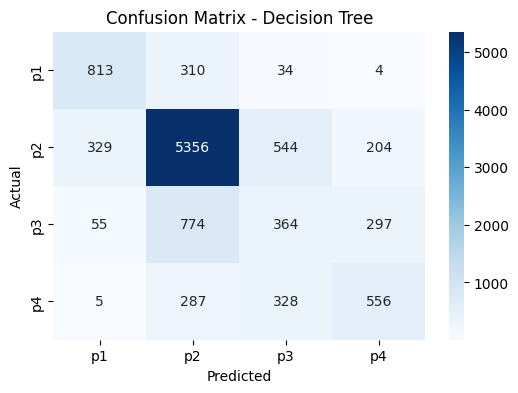

In [56]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['p1', 'p2', 'p3', 'p4']))
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")


print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['p1', 'p2', 'p3', 'p4']))
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")


print("Naïve Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=['p1', 'p2', 'p3', 'p4']))
plot_confusion_matrix(y_test, y_pred_nb, "Naïve Bayes")


print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['p1', 'p2', 'p3', 'p4']))
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

In [57]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from itertools import product

# Define hyperparameter grid
param_grid = {
    'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'max_depth': [3, 5, 8, 10],
    'alpha': [1, 10, 100],
    'n_estimators': [10, 50, 100]
}

# Prepare storage for results
results = []

# Load Data
y = df_transformed['remainder__Approved_Flag']
X = df_transformed.drop(['remainder__Approved_Flag'], axis=1)

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Loop through parameter combinations
for params in product(*param_grid.values()):
    colsample_bytree, learning_rate, max_depth, alpha, n_estimators = params

      # Define model
    model = xgb.XGBClassifier(
        objective='multi:softmax',
        num_class=len(np.unique(y_encoded)),
        colsample_bytree=colsample_bytree,
        learning_rate=learning_rate,
        max_depth=max_depth,
        alpha=alpha,
        n_estimators=n_estimators
    )

    # Train model
    model.fit(X_train, y_train)

    # Evaluate on train and test sets
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    # Store results
    results.append({
        'colsample_bytree': colsample_bytree,
        'learning_rate': learning_rate,
        'max_depth': max_depth,
        'alpha': alpha,
        'n_estimators': n_estimators,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy
    })

    # Print progress
    print(f"Params: {params} | Train Acc: {train_accuracy:.2f} | Test Acc: {test_accuracy:.2f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display best results
best_result = results_df.sort_values(by='test_accuracy', ascending=False).head(10)
print("\nTop 10 Hyperparameter Combinations:")
print(best_result)

Params: (0.1, 0.001, 3, 1, 10) | Train Acc: 0.62 | Test Acc: 0.64
Params: (0.1, 0.001, 3, 1, 50) | Train Acc: 0.63 | Test Acc: 0.64
Params: (0.1, 0.001, 3, 1, 100) | Train Acc: 0.63 | Test Acc: 0.64
Params: (0.1, 0.001, 3, 10, 10) | Train Acc: 0.62 | Test Acc: 0.64
Params: (0.1, 0.001, 3, 10, 50) | Train Acc: 0.62 | Test Acc: 0.64
Params: (0.1, 0.001, 3, 10, 100) | Train Acc: 0.63 | Test Acc: 0.64
Params: (0.1, 0.001, 3, 100, 10) | Train Acc: 0.62 | Test Acc: 0.64
Params: (0.1, 0.001, 3, 100, 50) | Train Acc: 0.62 | Test Acc: 0.64
Params: (0.1, 0.001, 3, 100, 100) | Train Acc: 0.62 | Test Acc: 0.64
Params: (0.1, 0.001, 5, 1, 10) | Train Acc: 0.63 | Test Acc: 0.64
Params: (0.1, 0.001, 5, 1, 50) | Train Acc: 0.63 | Test Acc: 0.64
Params: (0.1, 0.001, 5, 1, 100) | Train Acc: 0.63 | Test Acc: 0.64
Params: (0.1, 0.001, 5, 10, 10) | Train Acc: 0.63 | Test Acc: 0.64
Params: (0.1, 0.001, 5, 10, 50) | Train Acc: 0.63 | Test Acc: 0.64
Params: (0.1, 0.001, 5, 10, 100) | Train Acc: 0.63 | Test Acc